In [1]:
# Volitality model(ARCH & GARCH)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Data/GSPC_2021.csv", index_col = 0, parse_dates = True)
df

,^GSPC
Date,
1950-01-03,16.660000
1950-01-04,16.850000
1950-01-05,16.930000
1950-01-06,16.980000
1950-01-09,17.080000
...,...
2021-03-17,3974.120117
2021-03-18,3915.459961
2021-03-19,3913.100098


<AxesSubplot:xlabel='Date'>

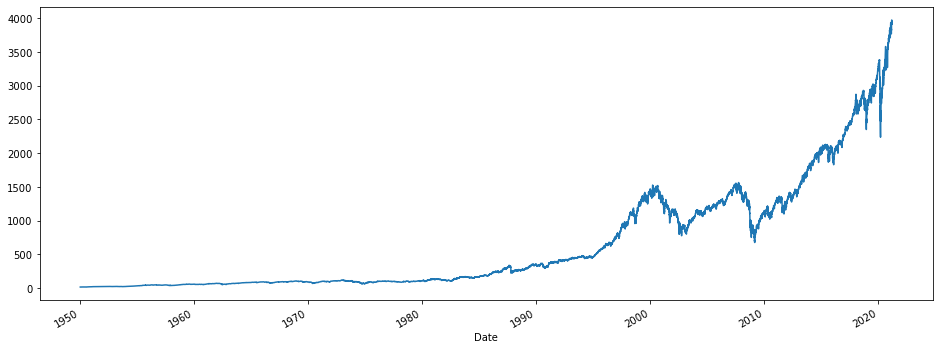

In [8]:
# plot data
ts = df["^GSPC"]
plt.rc("figure", figsize=(16, 6)) # rc = runtime configuration # make plot bigger
ts.plot()

<AxesSubplot:xlabel='Date'>

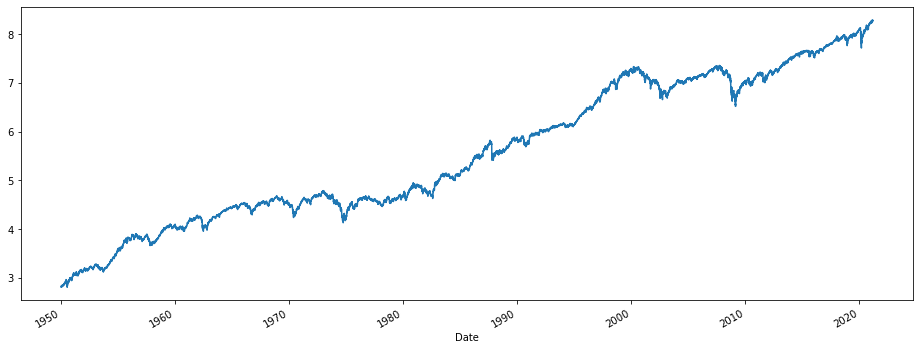

In [10]:
#log transform
logts = np.log(ts)
logts.plot()

<AxesSubplot:xlabel='Date'>

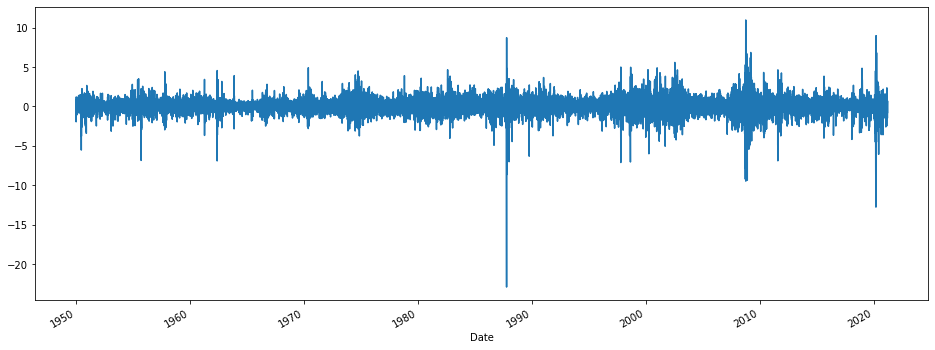

In [11]:
# calculate percentage change
returns = 100*logts.diff().dropna() # if diff too small, NA; so need 100*
returns.plot()

In [12]:
# resturn summary
returns.describe()

count    17920.000000
mean         0.030460
std          0.991713
min        -22.899729
25%         -0.403639
50%          0.048844
75%          0.499752
max         10.957197
Name: ^GSPC, dtype: float64

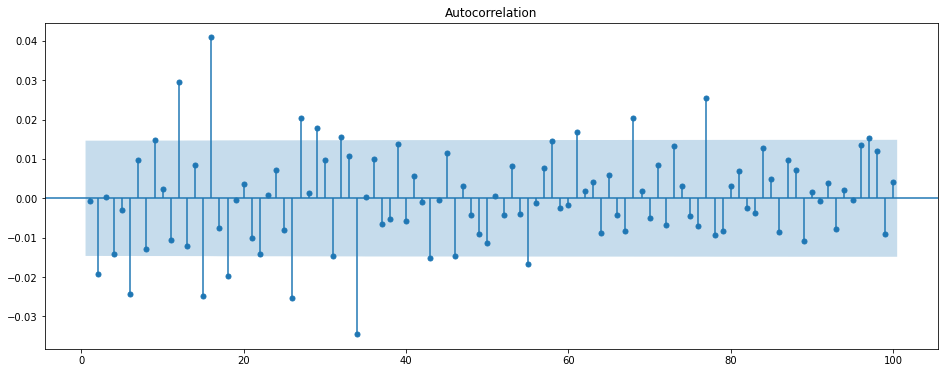

In [14]:
# auto correlation on percentage change
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns,lags=range(1,101)); # lag 1-100
# if large, means significant

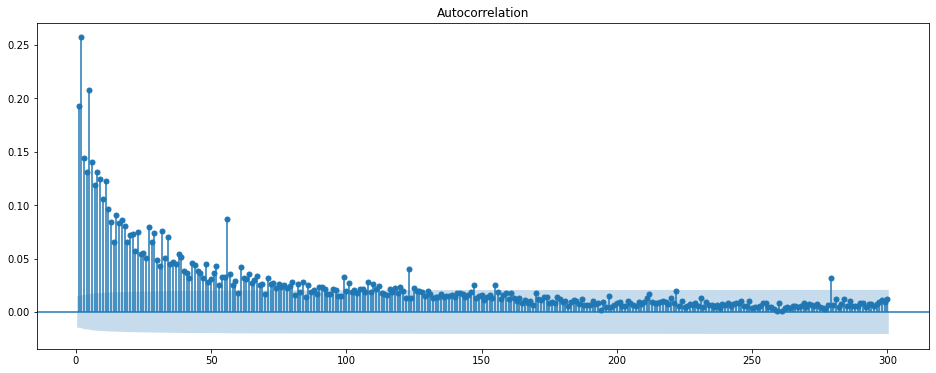

In [15]:
# squared auto correlation
returnsSquared = returns*returns
plot_acf(returnsSquared,lags=range(1,301));

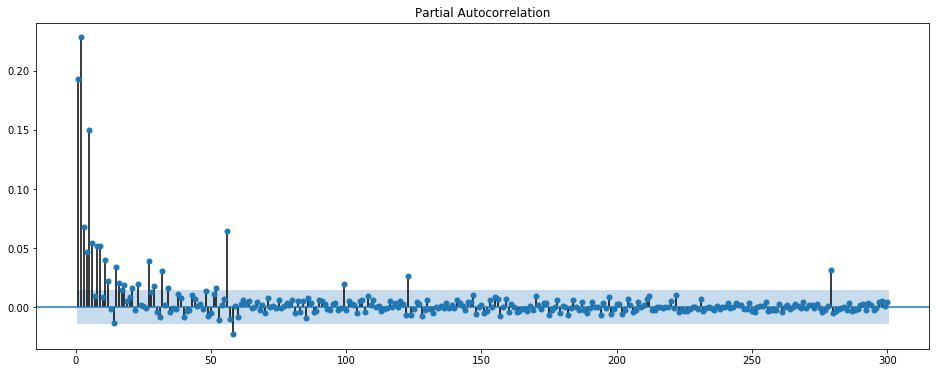

In [44]:
# squared partial auto correlation (help fit into ARCH)
plot_pacf(returnsSquared,lags=range(1,301));

In [16]:
! pip install arch
from arch import arch_model

     |████████████████████████████████| 795 kB 3.9 MB/s eta 0:00:01


In [17]:
# fit into arch model
# each iteration mini nega log likelihood
am = arch_model(returns)
fit = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6225819954.564468
Iteration:      2,   Func. Count:     16,   Neg. LLF: 27140202.71289891
Iteration:      3,   Func. Count:     24,   Neg. LLF: 21796.33200289885
Iteration:      4,   Func. Count:     30,   Neg. LLF: 32387.003330711508
Iteration:      5,   Func. Count:     38,   Neg. LLF: 21638.137816726776
Iteration:      6,   Func. Count:     44,   Neg. LLF: 21659.763572110573
Iteration:      7,   Func. Count:     50,   Neg. LLF: 21628.646366862376
Iteration:      8,   Func. Count:     56,   Neg. LLF: 21598.98706329744
Iteration:      9,   Func. Count:     61,   Neg. LLF: 21598.982361598493
Iteration:     10,   Func. Count:     66,   Neg. LLF: 21598.982349318598
Iteration:     11,   Func. Count:     70,   Neg. LLF: 21598.982349315233
Optimization terminated successfully    (Exit mode 0)
            Current function value: 21598.982349318598
            Iterations: 11
            Function evaluations: 70
            Gradient evaluat

In [18]:
# select the optimal model for us GARCH(alpha = 1, beta = 1)
# Don't use R square for measure, use AIC(smaller better) and log-likelihood(less negative better)
fit

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -21599.0
Distribution:                  Normal   AIC:                           43206.0
Method:            Maximum Likelihood   BIC:                           43237.1
                                        No. Observations:                17920
Date:                Mon, Apr 26 2021   Df Residuals:                    17919
Time:                        19:44:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0510  6.284e-03      8.116  4.824e-16 [3.

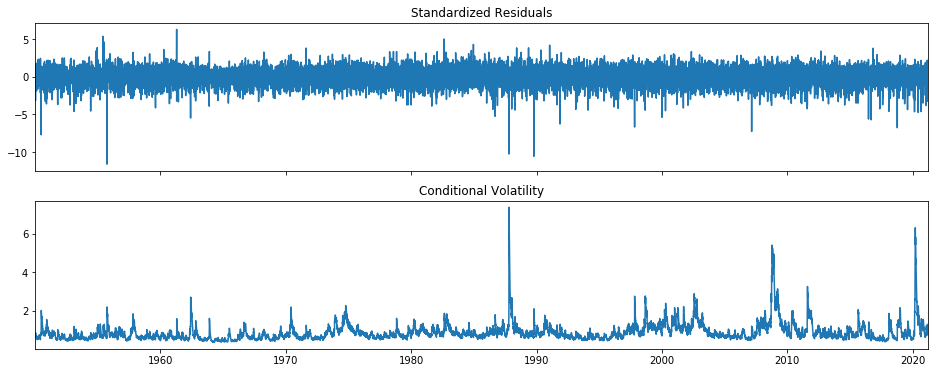

In [50]:
fit.plot(); # y_t = sigma_t*eps_t
# looks more iid than return
# conditional volatility is sigma_t

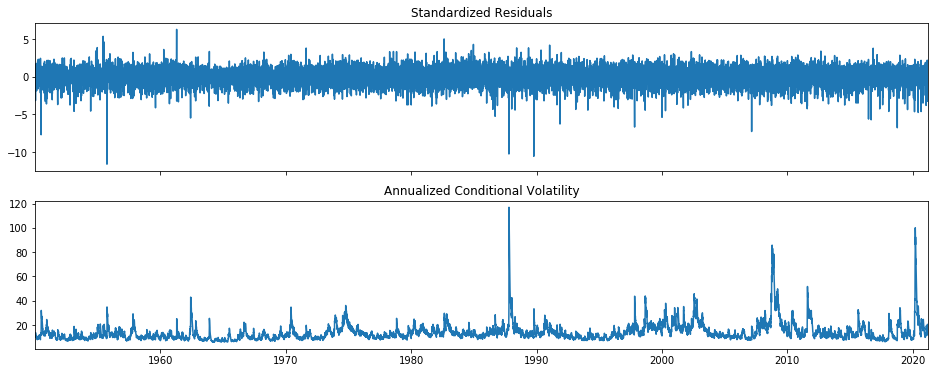

In [51]:
fit.plot(annualize="D"); # annual

In [52]:
# force it to be ARCH(1)
arch_model(returns, vol='ARCH', p=1).fit(disp='off')

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -23878.4
Distribution:                  Normal   AIC:                           47762.9
Method:            Maximum Likelihood   BIC:                           47786.2
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:11   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0480  7.855e-03      6.113  9.747e-10 [3.

In [53]:
# force it to be ARCH(10)
arch_model(returns, vol='ARCH', p=10).fit(disp='off')

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -21710.1
Distribution:                  Normal   AIC:                           43444.2
Method:            Maximum Likelihood   BIC:                           43537.7
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:12   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0556  6.015e-03      9.246  2.330e-20 [4.

In [54]:
# force it to be GARCH(1,2)
arch_model(returns, vol='GARCH', p=1, q=2).fit(disp='off')

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -21592.9
Distribution:                  Normal   AIC:                           43195.7
Method:            Maximum Likelihood   BIC:                           43234.7
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0512  6.290e-03      8.138  4.005e-16 [3.